# region_surface_areas

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()
np.random.seed(10)

## Genearate image for testing

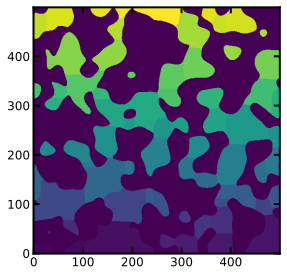

In [2]:
skel = ps.generators.blobs(shape=[500, 500])
im = ps.filters.prune_branches(skel)
r = ps.filters.snow_partitioning(im)
regions = r.regions
fig, ax = plt.subplots()
ax.imshow(regions, origin="lower");

## Apply metric function

Output is a list of the surface ares of each region

In [3]:
x = ps.metrics.region_surface_areas(regions=regions)

  0%|          | 0/72 [00:00<?, ?it/s]

In [4]:
regions_sur = np.copy(regions)
for i in range(0, len(x)):
    mask = np.array(np.where(regions_sur == i, regions_sur, 0), dtype=bool)
    regions_sur[mask] = x[i]

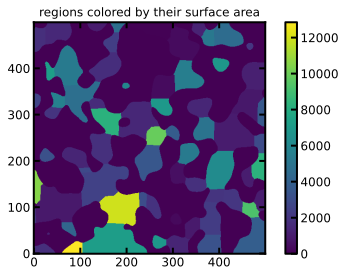

In [5]:
fig = plt.subplots()
plt.imshow(regions_sur, origin="lower")
plt.colorbar()
plt.title('pore regions colored by their surface area');

#### voxel size

In [6]:
xx = ps.metrics.region_surface_areas(regions=regions, voxel_size=10)

  0%|          | 0/72 [00:00<?, ?it/s]

In [7]:
regions_sur = np.copy(regions)
for i in range(0, len(xx)):
    mask = np.array(np.where(regions_sur == i, regions_sur, 0), dtype=bool)
    regions_sur[mask] = xx[i]

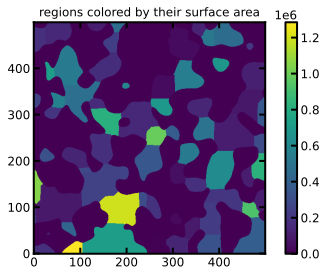

In [8]:
fig = plt.subplots()
plt.imshow(regions_sur, origin="lower")
plt.colorbar()
plt.title('pore regions colored by their surface area');